# Matplotlib

In [1]:
%matplotlib inline
import os
from IPython.core.display import HTML
def load_style(directory = '../../', name='customMac.css'):  
        styles = open(os.path.join(directory, name), 'r').read()
        return HTML(styles)
load_style()

[Matplotlib](https://matplotlib.org/) is a plotting library. In this section give a brief introduction to the `matplotlib.pyplot` module, which provides a plotting system similar to that of MATLAB.

In [2]:
import matplotlib.pyplot as plt

By running this special iPython command, we will be displaying plots inline:

In [3]:
%matplotlib inline

### Plotting

The most important function in `matplotlib` is plot, which allows you to plot 2D data. Here is a simple example:

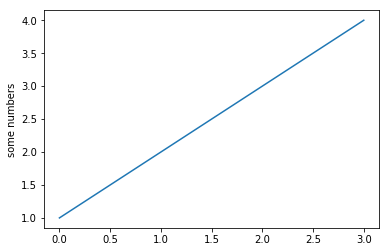

In [6]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

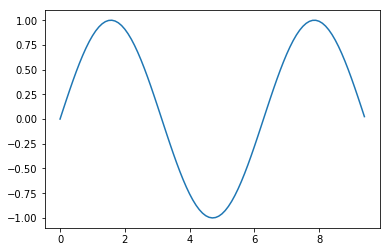

In [5]:
import numpy as np
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)

`plot()` is a versatile command, and will take an arbitrary number of arguments. For example, to plot x versus y, you can issue the command:

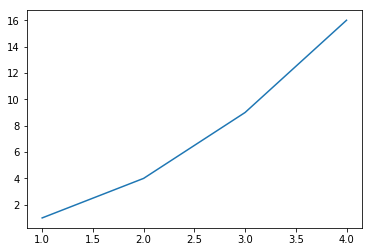

In [7]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

### Formatting the style of your plot

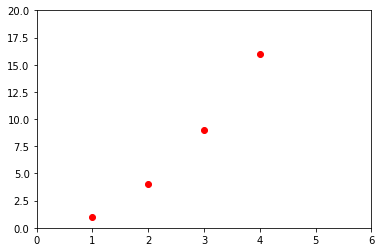

In [8]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([0, 6, 0, 20])   # xlim and ylim  [xmin, xmax, ymin, ymax]
plt.show()

If matplotlib were limited to working with lists, it would be fairly useless for numeric processing. Generally, you will use numpy arrays. In fact, all sequences are converted to numpy arrays internally. The example below illustrates a plotting several lines with different format styles in one command using arrays.

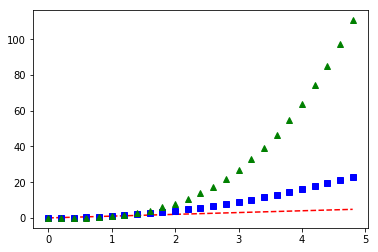

In [9]:
import numpy as np

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

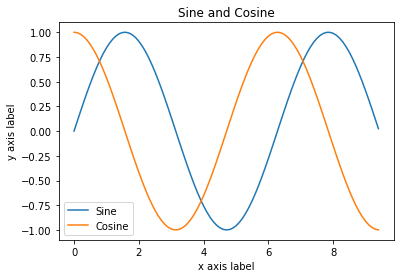

In [6]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])

### Subplots 

You can plot different things in the same figure using the subplot function. Here is an example:

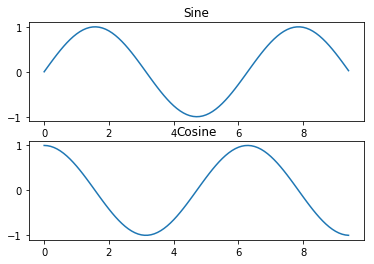

In [7]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()

You can read much more about the `subplot` function in the [documentation](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot).

## Plotting with keyword strings
There are some instances where you have data in a format that lets you access particular variables with strings. For example, with numpy.recarray or pandas.DataFrame.

Matplotlib allows you provide such an object with the data keyword argument. If provided, then you may generate plots with the strings corresponding to these variables.

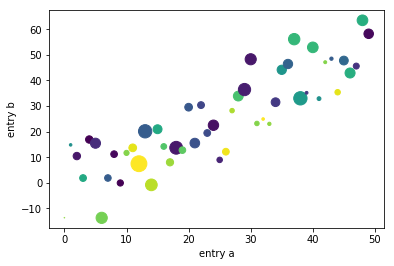

In [10]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

### Plotting with categorical variables
It is also possible to create a plot using categorical variables. Matplotlib allows you to pass categorical variables directly to many plotting functions. For example:

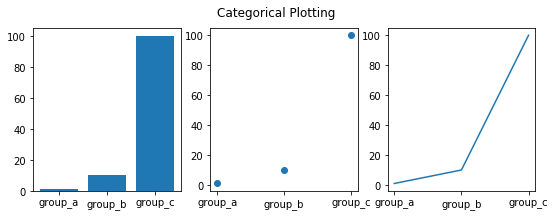

In [11]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

## Working with multiple figures and axes

MATLAB, and pyplot, have the concept of the current figure and the current axes. All plotting commands apply to the current axes. The function gca() returns the current axes (a matplotlib.axes.Axes instance), and gcf() returns the current figure (matplotlib.figure.Figure instance). Normally, you don't have to worry about this, because it is all taken care of behind the scenes. Below is a script to create two subplots.

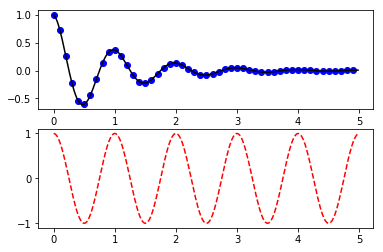

In [15]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure()
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

## Working with text
The text() command can be used to add text in an arbitrary location, and the xlabel(), ylabel() and title() are used to add text in the indicated locations (see Text in Matplotlib Plots for a more detailed example)

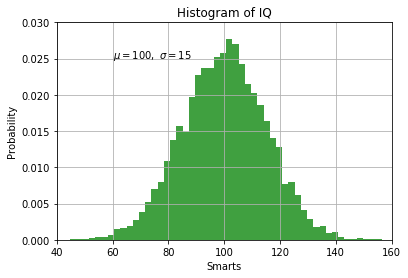

In [12]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

## Logarithmic and other nonlinear axes

matplotlib.pyplot supports not only linear axis scales, but also logarithmic and logit scales. This is commonly used if data spans many orders of magnitude. Changing the scale of an axis is easy:

plt.xscale('log')
An example of four plots with the same data and different scales for the y axis is shown below.

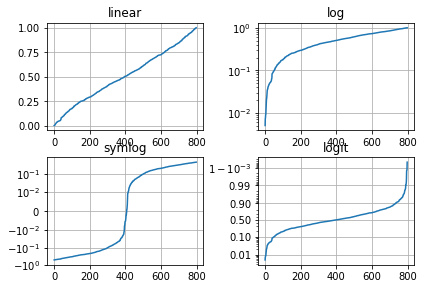

In [13]:
from matplotlib.ticker import NullFormatter  # useful for `logit` scale

# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the interval ]0, 1[
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure()

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)


# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)


# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthreshy=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
plt.gca().yaxis.set_minor_formatter(NullFormatter())
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()

## Annotating text

The uses of the basic text() command above place text at an arbitrary position on the Axes. A common use for text is to annotate some feature of the plot, and the annotate() method provides helper functionality to make annotations easy. In an annotation, there are two points to consider: the location being annotated represented by the argument xy and the location of the text xytext. Both of these arguments are (x,y) tuples.

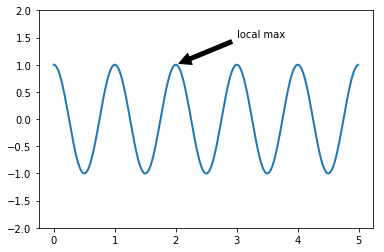

In [14]:
ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

plt.ylim(-2, 2)
plt.show()

## Images

You can use the `imshow` function to show images. Here is an example:

In [26]:
import scipy
scipy.__version__


'1.2.0'

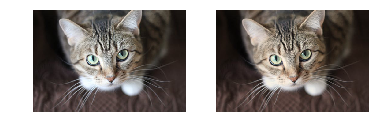

In [18]:
import numpy as np
#from scipy.misc import imread, imresize
from imageio import imread
import matplotlib.pyplot as plt

img = imread('../Images/cat.jpg')   # imread is deprecated in SciPy 1.2.0
img_tinted = img * [1, 0.95, 0.9]

# Show the original image
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis('off')

# Show the tinted image
plt.subplot(1, 2, 2)

# A slight gotcha with imshow is that it might give strange results
# if presented with data that is not uint8. To work around this, we
# explicitly cast the image to uint8 before displaying it.
plt.imshow(np.uint8(img_tinted))
plt.axis('off')
plt.show()